In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [180]:
data_fake = pd.read_csv('Fake.csv')
data_true = pd.read_csv('True.csv')

In [181]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [182]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


<ipython-input-183-2344fae4ad0d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=data_merge, palette=['blue', 'orange'])  # Specify colors for Fake and Real


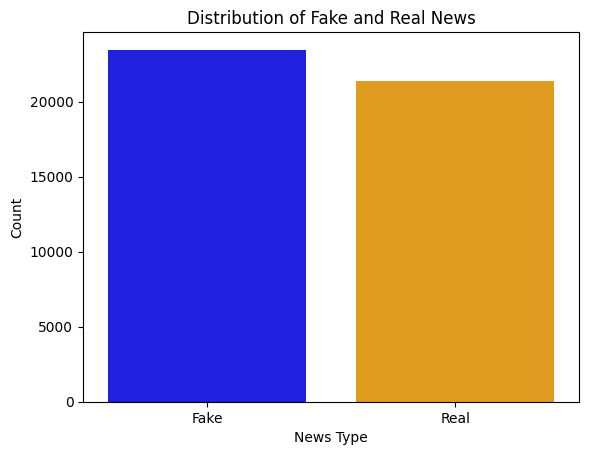

In [183]:
fake_count = data_merge['class'].value_counts()[0]
true_count = data_merge['class'].value_counts()[1]

sns.countplot(x='class', data=data_merge, palette=['blue', 'orange'])  # Specify colors for Fake and Real
plt.title('Distribution of Fake and Real News')
plt.xlabel('News Type')
plt.ylabel('Count')
plt.xticks([0, 1], ['Fake', 'Real'])
plt.show()

<ipython-input-184-b0f06d15b2bb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='subject', y='count', data=subject_counts, palette='magma')  # Change 'viridis' to your desired palette


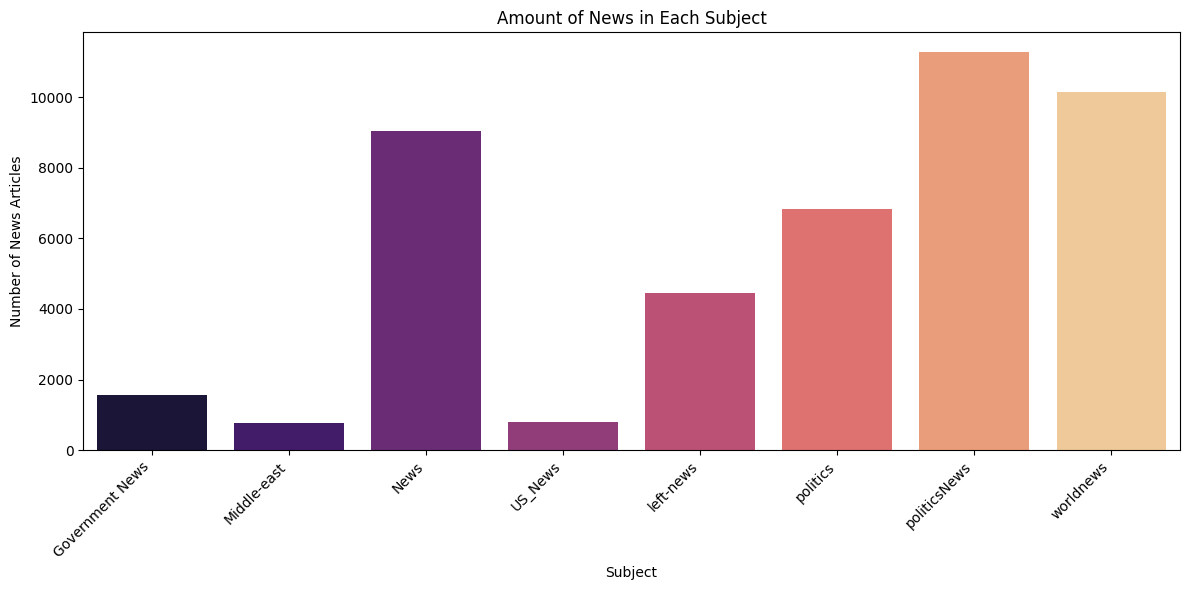

In [184]:
subject_counts = data_merge.groupby('subject')['text'].count().reset_index()
subject_counts.columns = ['subject', 'count']

plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='subject', y='count', data=subject_counts, palette='magma')  # Change 'viridis' to your desired palette
plt.title('Amount of News in Each Subject')
plt.xlabel('Subject')
plt.ylabel('Number of News Articles')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

In [185]:
data_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [186]:
data_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [187]:
data_fake['class'] = 0  #we are inserting column class as a target feature
data_true['class'] = 1

In [188]:
data_fake.shape, data_true.shape

((23481, 5), (21417, 5))

In [189]:
data_fake_manual_testing = data_fake.tail(10)
for i in range(23480, 23470, -1):
    data_fake.drop([i], axis = 0, inplace = True)

data_true_manual_testing = data_true.tail(10)
for i in range(21416, 21406, -1):
    data_true.drop([i], axis = 0, inplace = True)

In [190]:
data_fake.shape, data_true.shape

((23471, 5), (21407, 5))

In [191]:
data_fake_manual_testing['class'] = 0
data_true_manual_testing['class'] = 1

<ipython-input-191-90008d39c97b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class'] = 0
<ipython-input-191-90008d39c97b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_true_manual_testing['class'] = 1


In [192]:
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [193]:
data_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [194]:
data_merge = pd.concat([data_fake, data_true], axis = 0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [195]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [196]:
data = data_merge.drop(['title', 'subject', 'date'], axis = 1)

In [197]:
data.isnull().sum()

,0
text,0
class,0


In [198]:
data = data.sample(frac = 1)

In [199]:
data.head()

,text,class
4887,(Reuters) - U.S. Secretary of State Rex Tiller...,1
11118,WASHINGTON (Reuters) - The White House said Vi...,1
10118,WASHINGTON (Reuters) - Only six more nations n...,1
5189,No wonder Donald Trump is accusing everything ...,0
8184,WASHINGTON (Reuters) - Hillary Clinton’s bout ...,1


In [200]:
data.reset_index(inplace = True)
data.drop(['index'], axis = 1, inplace = True)

In [201]:
data.columns

Index(['text', 'class'], dtype='object')

In [202]:
data.head()

,text,class
0,(Reuters) - U.S. Secretary of State Rex Tiller...,1
1,WASHINGTON (Reuters) - The White House said Vi...,1
2,WASHINGTON (Reuters) - Only six more nations n...,1
3,No wonder Donald Trump is accusing everything ...,0
4,WASHINGTON (Reuters) - Hillary Clinton’s bout ...,1


In [203]:
# function to process the text
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W", " ", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [204]:
data['text'] = data['text'].apply(wordopt)

In [205]:
# defining dependent and independent variables
x = data['text']
y = data['class']

In [206]:
# spliting training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [207]:
# converting text to vectors
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [208]:
# applying logistic regression
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train, y_train)

LogisticRegression()

In [209]:
pred_lr = LR.predict(xv_test)

In [210]:
# accuracy of Linear Regression
LR.score(xv_test, y_test)*100

98.77005347593582

In [211]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5958
           1       0.98      0.99      0.99      5262

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [212]:
# applying decission tree
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [213]:
pred_dt = DT.predict(xv_test)

In [214]:
# accuracy of Decision Tree
DT.score(xv_test, y_test)*100

99.67914438502675

In [215]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5958
           1       1.00      1.00      1.00      5262

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [216]:
# applying Gradient Boosting Classifier              [takes longer time to execute]
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(random_state = 0)
GB.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [217]:
pred_gb = GB.predict(xv_test)

In [218]:
# accuracy of Gradient Boosting Classifier
GB.score(xv_test, y_test)*100

99.6078431372549

In [219]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5958
           1       0.99      1.00      1.00      5262

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [220]:
# applying Random Forest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state = 0)
RF.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [221]:
pred_rf = RF.predict(xv_test)

In [222]:
# accuracy of Random Forest
RF.score(xv_test, y_test)*100

99.01960784313727

In [223]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5958
           1       0.99      0.99      0.99      5262

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



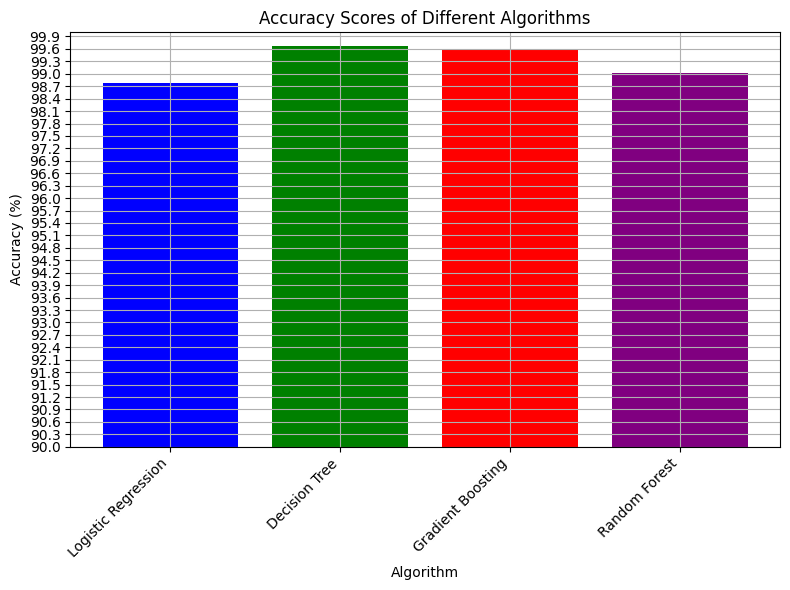

In [224]:
# Accuracy scores obtained from the previous code
accuracy_scores = {
    'Logistic Regression': LR.score(xv_test, y_test) * 100,
    'Decision Tree': DT.score(xv_test, y_test) * 100,
    'Gradient Boosting': GB.score(xv_test, y_test) * 100,
    'Random Forest': RF.score(xv_test, y_test) * 100
}

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'red', 'purple'])
plt.title('Accuracy Scores of Different Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy (%)')
plt.ylim(90, 100)  # Set y-axis limits for better visualization
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Set y-axis ticks with more detail
plt.yticks(np.arange(90, 100.1, 0.3))  # Create ticks from 90 to 100 with a step of 0.1

# Turn on the grid
plt.grid(True)

plt.tight_layout()
plt.show()

In [225]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GB = GB.predict(new_xv_test)
    pred_RF = RF.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGB Prediction: {} \nRF Prediction: {}".format(output_lable(pred_LR[0]),
                                                                                                              output_lable(pred_DT[0]),
                                                                                                              output_lable(pred_GB[0]),
                                                                                                              output_lable(pred_RF[0])))

In [226]:
news = str(input())
manual_testing(news)

WASHINGTON (Reuters) - President Donald Trump, in a first exercise of his power to commute criminal sentences, cut short the 27-year prison term of a kosher meatpacking executive who was convicted eight years ago of bank fraud, the White House said on Wednesday. The commutation granted to Sholom Rubashkin, 57, marked only the second time that Trump has invoked his clemency authority as president, following the blanket pardon he granted earlier this year to Joe Arpaio, the former sheriff of Maricopa County in Arizona. Unlike the case of Arpaio, whom a judge had found guilty of contempt in a case involving racial profiling, Trumpâ€™s latest action leaves Rubashkinâ€™s conviction intact, as well as terms of his supervised release from federal prison and his obligation to make restitution. Rubashkin was convicted in 2009 of 86 counts of financial fraud that came to light after a government raid on a kosher meatpacking plant in Postville, Iowa, where hundreds of undocumented immigrant worke